In [1]:
import numpy as np
import pandas as pd
import pathlib as pt
import PIL

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# add the column subset in order to remember the original split
mass_train_df = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv")
mass_train_df['subset'] = 'train'

mass_test_df = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_test_set.csv")
mass_test_df['subset'] = 'test'

calc_train_df = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv")
calc_train_df['subset'] = 'train'

calc_test_df = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_test_set.csv")
calc_test_df['subset'] = 'test'

In [3]:
data_df = pd.concat([mass_train_df, calc_train_df, mass_test_df, calc_test_df], sort=False).reset_index()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3568 entries, 0 to 3567
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    3568 non-null   int64  
 1   patient_id               3568 non-null   object 
 2   breast_density           1696 non-null   float64
 3   left or right breast     3568 non-null   object 
 4   image view               3568 non-null   object 
 5   abnormality id           3568 non-null   int64  
 6   abnormality type         3568 non-null   object 
 7   mass shape               1692 non-null   object 
 8   mass margins             1636 non-null   object 
 9   assessment               3568 non-null   int64  
 10  pathology                3568 non-null   object 
 11  subtlety                 3568 non-null   int64  
 12  image file path          3568 non-null   object 
 13  cropped image file path  3568 non-null   object 
 14  ROI mask file path      

In [4]:
data_df.head(20)

,index,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path,subset,breast density,calc type,calc distribution
0,0,P_00001,3.0,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,train,NaN,NaN,NaN
1,1,P_00001,3.0,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,train,NaN,NaN,NaN
2,2,P_00004,3.0,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,train,NaN,NaN,NaN
3,3,P_00004,3.0,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,train,NaN,NaN,NaN
4,4,P_00004,3.0,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,train,NaN,NaN,NaN
5,5,P_00009,3.0,RIGHT,CC,1,mass,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass-Training_P_00009_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9...,train,NaN,NaN,NaN
6,6,P_00009,3.0,RIGHT,MLO,1,mass,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass-Training_P_00009_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00009_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00009_RIGHT_MLO_1/1.3.6.1.4.1....,train,NaN,NaN,NaN
7,7,P_00015,3.0,LEFT,MLO,1,mass,IRREGULAR,ILL_DEFINED-SPICULATED,4,MALIGNANT,4,Mass-Training_P_00015_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00015_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00015_LEFT_MLO_1/1.3.6.1.4.1.9...,train,NaN,NaN,NaN
8,8,P_00018,2.0,RIGHT,CC,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00018_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_00018_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_00018_RIGHT_CC_1/1.3.6.1.4.1.9...,train,NaN,NaN,NaN
9,9,P_00018,2.0,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00018_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00018_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00018_RIGHT_MLO_1/1.3.6.1.4.1....,train,NaN,NaN,NaN


In [5]:
print(len(data_df))

3568


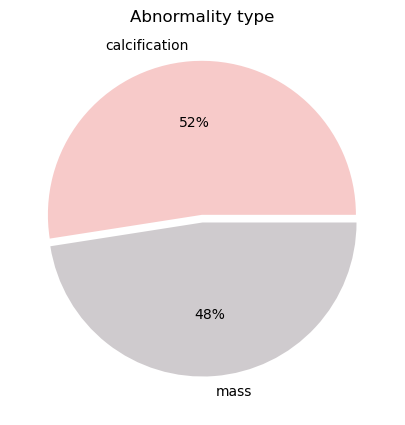

In [6]:
# plot a pie chart to show the distribution of different lesion types in 
# the dataset, (masses/calcifications)

# Define the RGB values for the colors
color1 = (247, 202, 201)  # rose
color2 = (207, 203, 206) # grey

# Convert the RGB values to normalized floats between 0 and 1
color1_norm = tuple(c / 255 for c in color1)
color2_norm = tuple(c / 255 for c in color2)

plt.figure(figsize=(7, 5))

# Custom color palette with the RGB colors
palette = sns.color_palette([color1_norm, color2_norm])

abnormality_insight = data_df["abnormality type"].value_counts()

plt.pie(data=data_df,  x=abnormality_insight.values, labels=abnormality_insight.index, autopct='%.0f%%', colors=palette, explode = [0.05,0])

plt.title("Abnormality type")


plt.show()


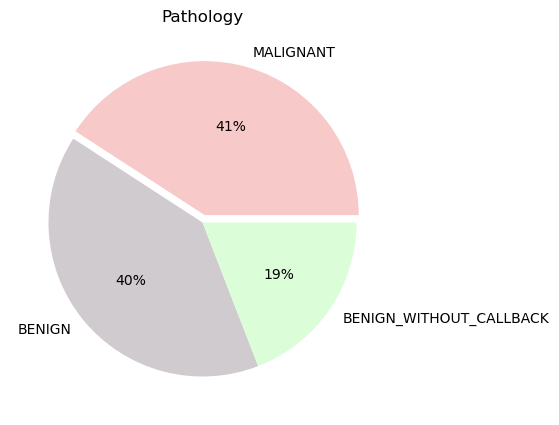

In [7]:
# plot a pie chart to show the distribution of different lesion types in 
# the dataset, (malignant/benign/benign without callback)

# Define the RGB values for the colors
color3 = (219, 254, 217)  # mint green

# Convert the RGB values to normalized floats between 0 and 1
color3_norm = tuple(c / 255 for c in color3)

plt.figure(figsize=(7, 5))

# Custom color palette with the RGB colors
palette = sns.color_palette([color1_norm, color2_norm, color3_norm])

pathology_insight = data_df["pathology"].value_counts()

plt.pie(data=data_df,  x=pathology_insight.values, labels=pathology_insight.index, autopct='%.0f%%', colors=palette, explode = [0.05,0,0])

plt.title("Pathology")
plt.show()


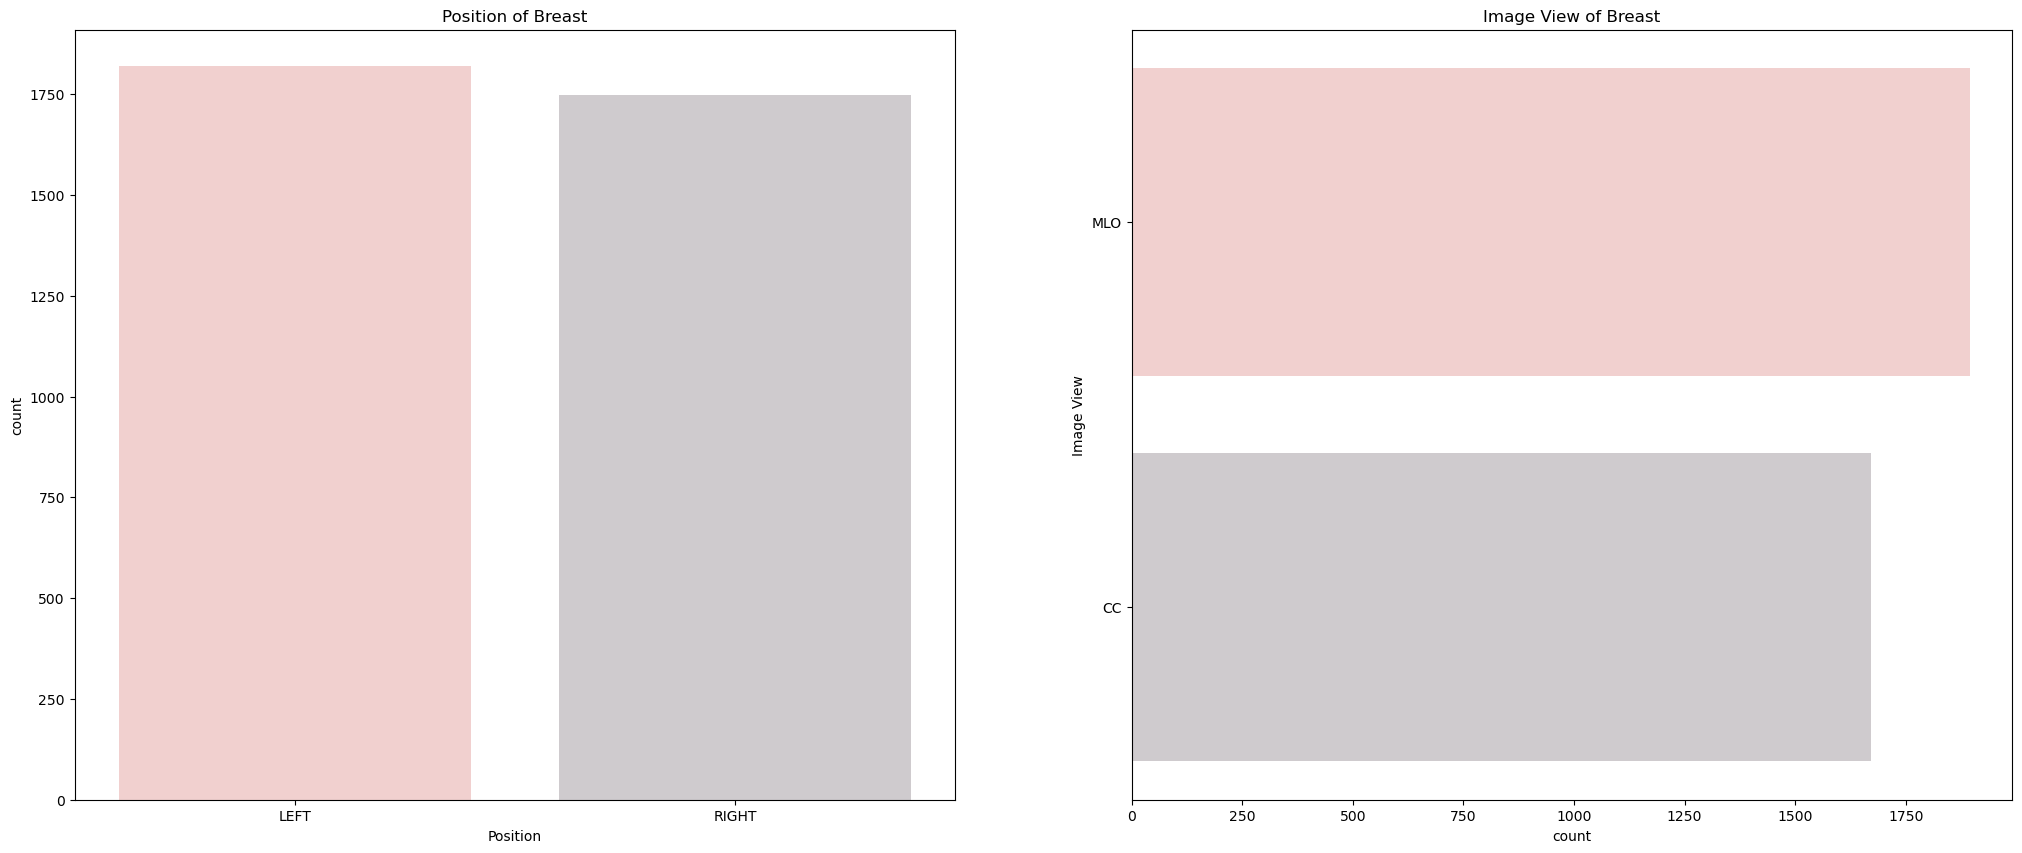

In [8]:
# plot 2 bar charts:
# first shows the distribution of mammographies depending on the position of the breast (left/right)
# second shows the distribution of mammographies depending on the image view of the breast (CC/MLO)

plt.figure(figsize=(25, 10))
palette = sns.color_palette([color1_norm, color2_norm])

plt.subplot(1, 2, 1)
breat_type = data_df['left or right breast'].value_counts()

sns.barplot(x=breat_type.index, y=breat_type.values, palette=palette)
plt.xlabel('Position')
plt.ylabel('count')
plt.title("Position of Breast")

plt.subplot(1, 2, 2)
palette = sns.color_palette([color1_norm, color2_norm])

image_view = data_df['image view'].value_counts()

sns.barplot(y=image_view.index, x=image_view.values, palette=palette)
plt.xlabel('count')
plt.ylabel('Image View')
plt.title("Image View of Breast")

plt.show()

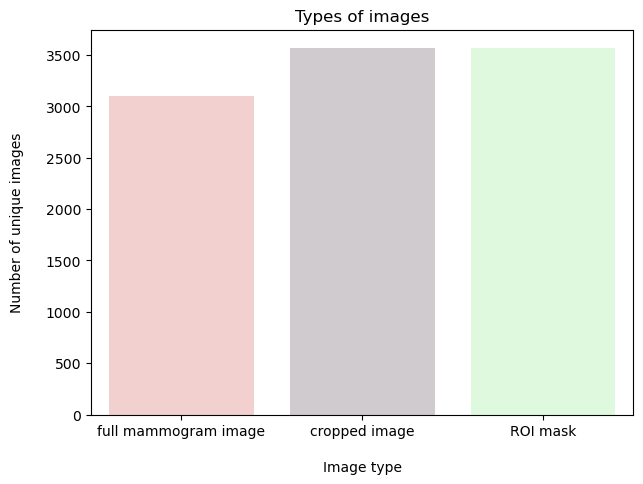

In [9]:
# plot a vertical bar chart to show the distribution of different image types that can be 
# found in the dataset, (full mammogram_image/cropped image/ROI mask)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

columns_to_plot = ['image file path', 'cropped image file path', 'ROI mask file path']
new_column_names = ['full mammogram image', 'cropped image', 'ROI mask']

# create a copy of the dataframe because i want to rename the columns for the purpose of plotting
data_df_copy = data_df[columns_to_plot].copy()
data_df_copy = data_df.rename(columns=dict(zip(columns_to_plot, new_column_names)))
unique_counts = data_df_copy[new_column_names].nunique()

palette = sns.color_palette([color1_norm, color2_norm, color3_norm])
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette=palette)
plt.xlabel("\nImage type")
plt.ylabel("Number of unique images\n")
plt.title("Types of images")

# show the plot
plt.show()

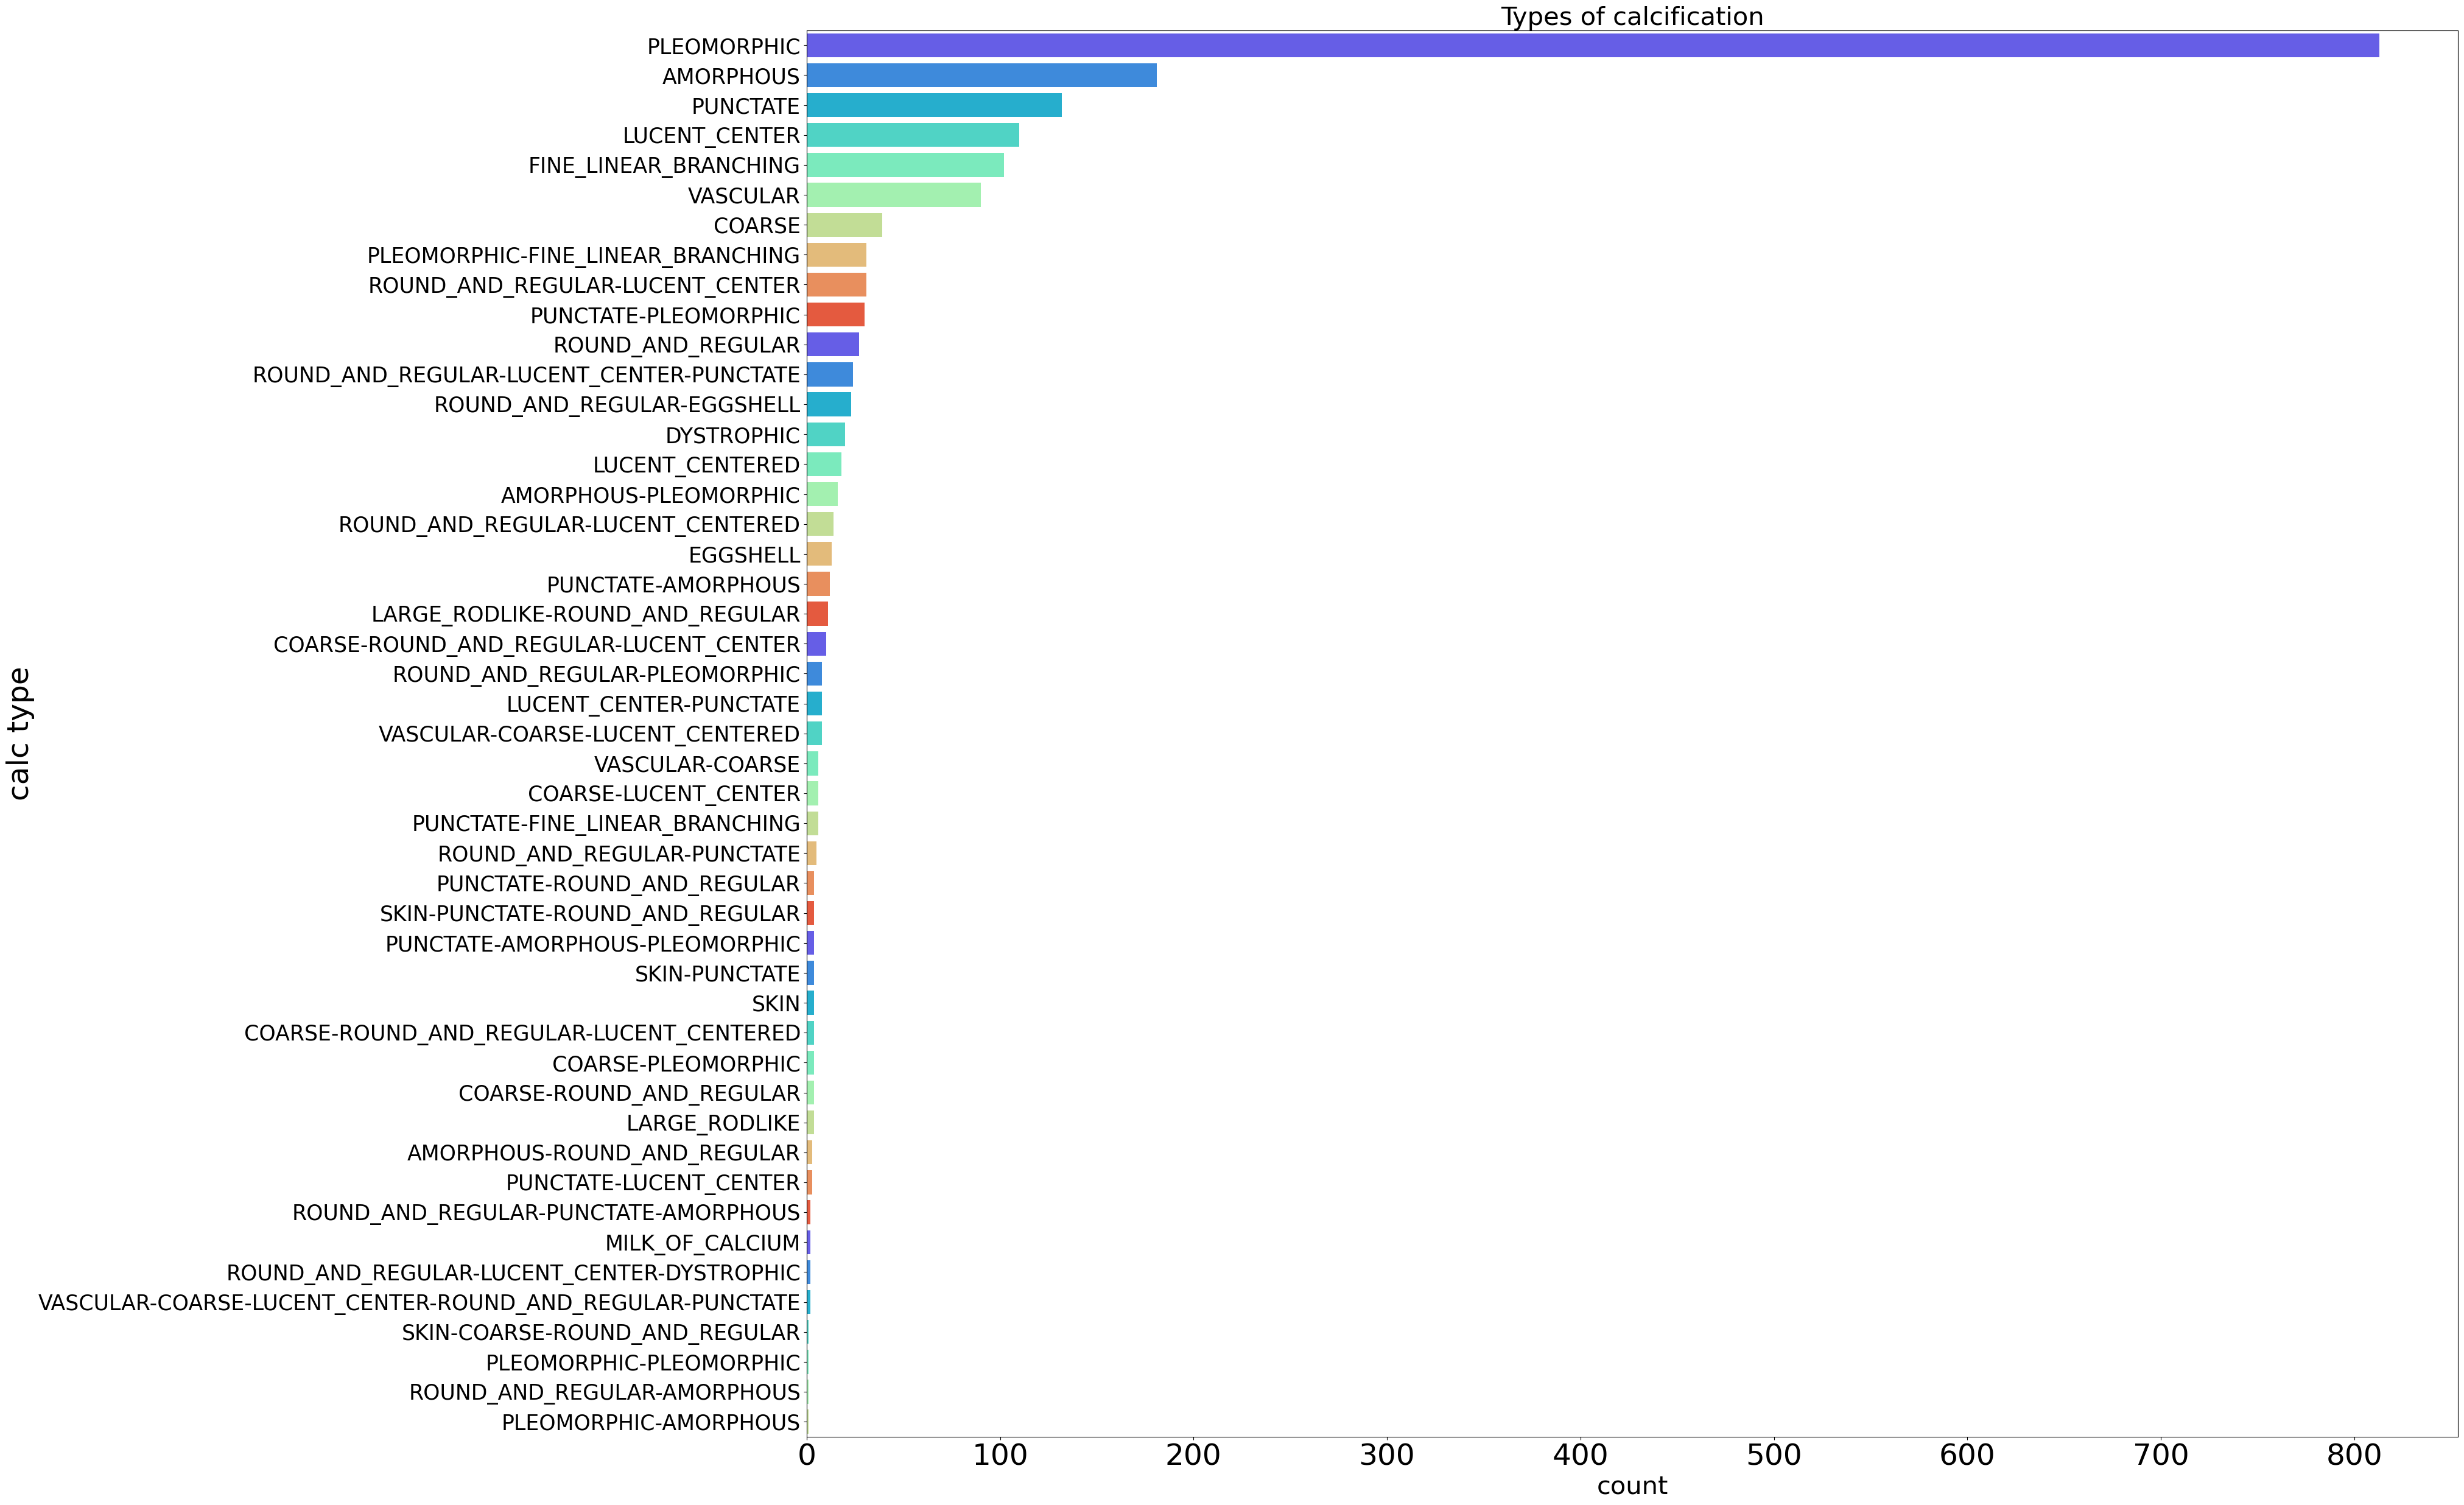

In [10]:
# plot a horizontal bar chart to show the distribution of different calcification types in the dataset

plt.figure(figsize=(35, 30))
palette = sns.color_palette("rainbow", 10)

calc_type = data_df['calc type'].value_counts()

sns.barplot(y=calc_type.index, x=calc_type.values, palette=palette)
plt.ylabel('calc type')

plt.xlabel('count', fontsize=30)
plt.ylabel('calc type', fontsize=35)

plt.xlabel('count', fontsize=30)
plt.title("Types of calcification", fontsize=30)
plt.yticks(fontsize=25)
plt.xticks(fontsize=35)
plt.show()

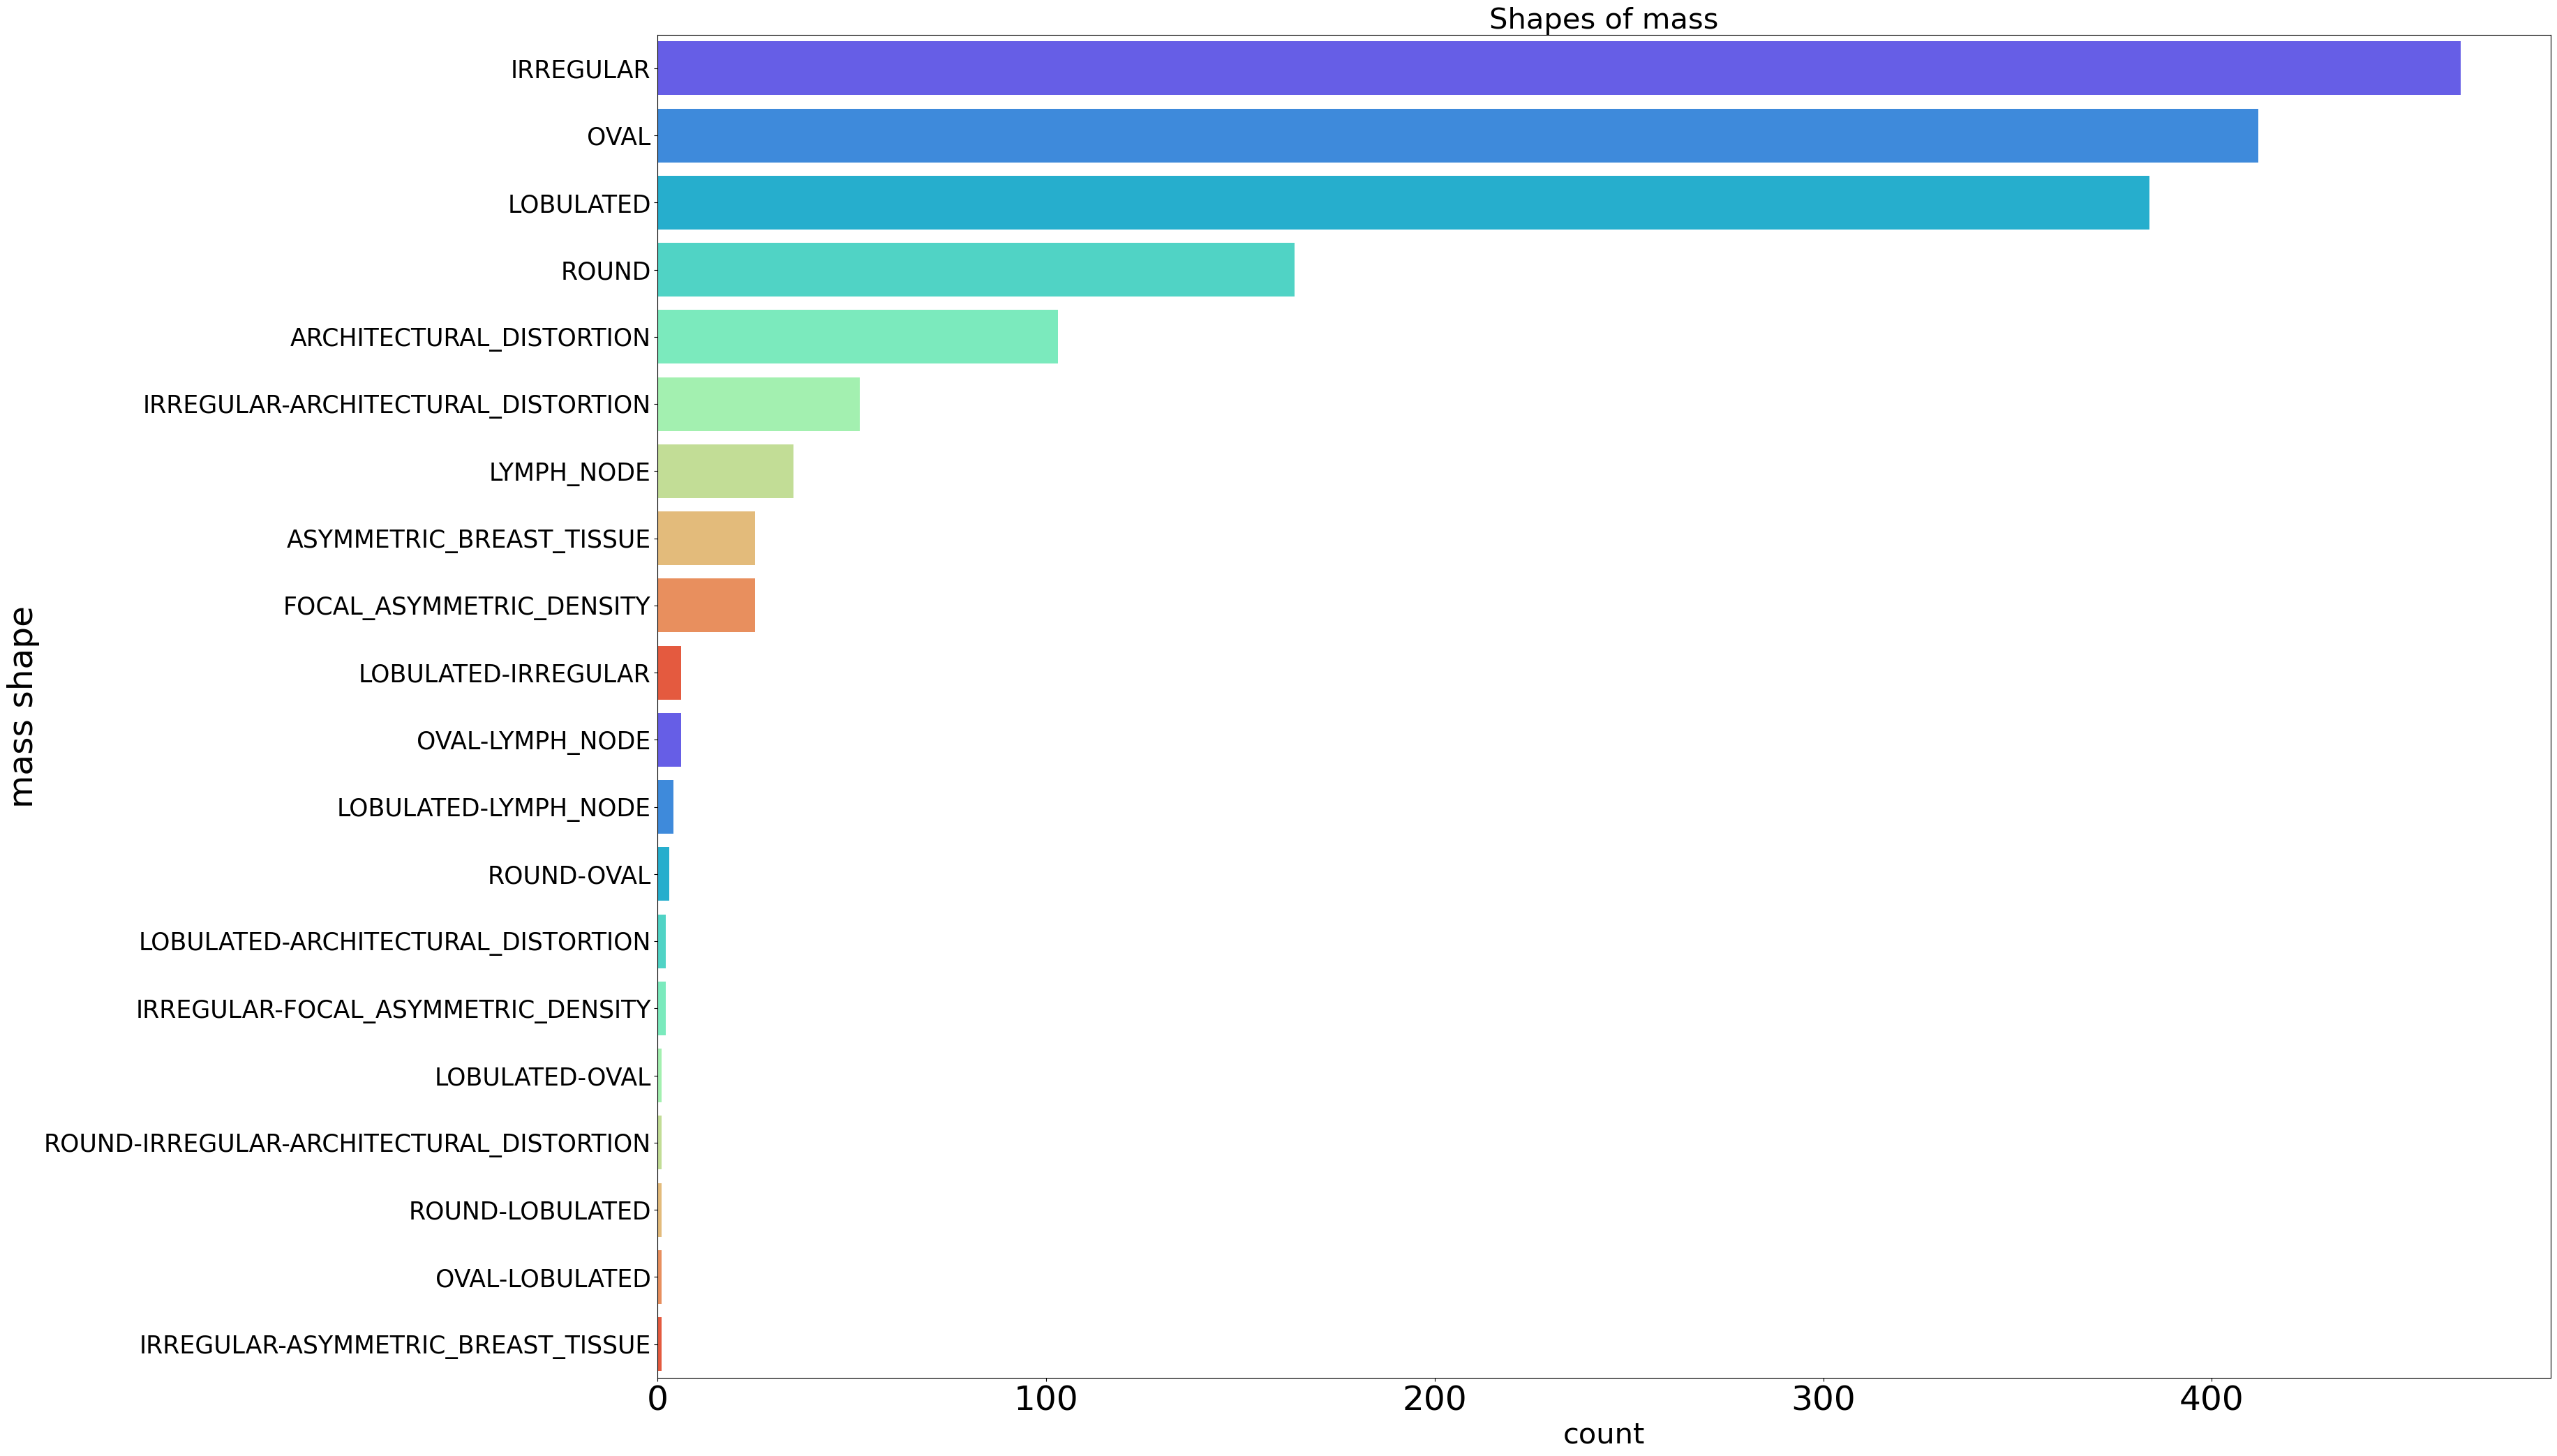

In [11]:
# plot a horizontal bar chart to show the distribution of different masses shapes in the dataset

plt.figure(figsize=(35, 25))
palette = sns.color_palette("rainbow", 10)

calc_type = data_df['mass shape'].value_counts()

sns.barplot(y=calc_type.index, x=calc_type.values, palette=palette)
plt.ylabel('calc type')

plt.xlabel('count', fontsize=30)
plt.ylabel('mass shape', fontsize=35)

plt.xlabel('count', fontsize=30)
plt.title("Shapes of mass", fontsize=30)
plt.yticks(fontsize=25)
plt.xticks(fontsize=35)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


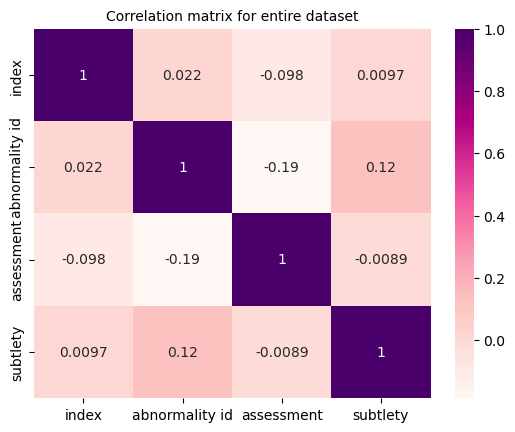

In [12]:
# plot a correlation matrix for identifying patterns and relationships between variables

def plotCorrelationMatrix(df):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr_matrix = df.corr()
    palette = sns.color_palette("pastel")
    plt.title("Correlation matrix for entire dataset", fontsize=10)
    # plot the correlation matrix
    sns.heatmap(corr_matrix, annot=True, cmap="RdPu")
    
plotCorrelationMatrix(data_df)

In [13]:
# Search for the coresponding jpg file in dicom.info for a set of given parameters 
# series_description can be: full mammogram images/cropped images/ROI mask images
def find_jpg_path(series_description, study_uid, series_uid):
    csv_file = "/kaggle/input/dicom-info/dicom_info_complete (1).csv"
#     csv_file = "/kaggle/input/dicom-info/dicom_info_complete (1).csv"
    dicom_df = pd.read_csv(csv_file)
    result_row = dicom_df[(dicom_df["SeriesDescription"] == series_description)
                 & (dicom_df["StudyInstanceUID"] == study_uid) 
                 & (dicom_df["SeriesInstanceUID"] == series_uid)]
    
    return result_row
                       

In [14]:
print(len(data_df))

3568


In [15]:
import os

full_mammo=[]
cropped_images=[]
masks=[]
err=[]

for i in range (len(data_df)):
    row = data_df.iloc[i]  # select current row
    
    path_full_mammo = data_df["image file path"].iloc[i].split("/", 1)[1]
    series_description="full mammogram images"
    study_uid, series_uid, dcm_filename = path_full_mammo.split("/")
    path_full_mammo_jpg=find_jpg_path(series_description, study_uid, series_uid)

    path_crop_img = data_df["cropped image file path"].iloc[i].split("/", 1)[1]
    series_description = "cropped images"
    study_uid, series_uid, dcm_filename = path_crop_img.split("/")
    path_crop_img_jpg = find_jpg_path(series_description, study_uid, series_uid)   

    path_roi_mask = data_df["ROI mask file path"].iloc[i].split("/", 1)[1]
    series_description = "ROI mask images"
    study_uid, series_uid, dcm_filename = path_roi_mask.split("/")
    path_roi_mask_jpg = find_jpg_path(series_description, study_uid, series_uid)   
    
    try:
        full_mammo.append(path_full_mammo_jpg["image_path"].iloc[0])
        try:
            cropped_images.append(path_crop_img_jpg["image_path"].iloc[0])
            try:
                masks.append(path_roi_mask_jpg["image_path"].iloc[0])  
            except IndexError:
                err.append(i)
                full_mammo.pop()
                cropped_images.pop()
        except IndexError:
            err.append(i)
            full_mammo.pop()
    except IndexError:
        err.append(i)
#     print(str(i) + "-" + str(len(full_mammo)) + "-" + str(len(cropped_images)) + "-" + str(len(masks)))

In [16]:
image_dir="/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg"
full_mammo = [x.replace('CBIS-DDSM/jpeg', image_dir) for x in full_mammo]
cropped_images = [x.replace('CBIS-DDSM/jpeg', image_dir) for x in cropped_images]
masks = [x.replace('CBIS-DDSM/jpeg', image_dir) for x in masks]

In [17]:
print(len(full_mammo))
print(len(cropped_images))
print(len(masks))
print(err)
for i in err:
    data_df=data_df.drop(i)
print(len(data_df))

3550
3550
3550
[1662, 2534, 3262, 3287, 3292, 3308, 3357, 3360, 3361, 3362, 3365, 3410, 3429, 3464, 3471, 3523, 3536, 3540]
3550


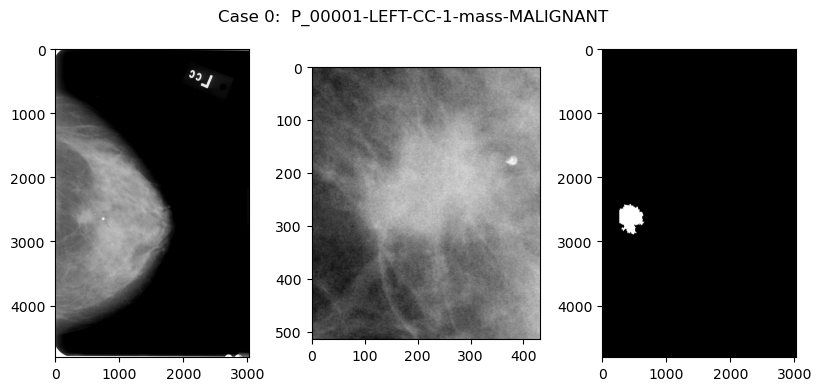

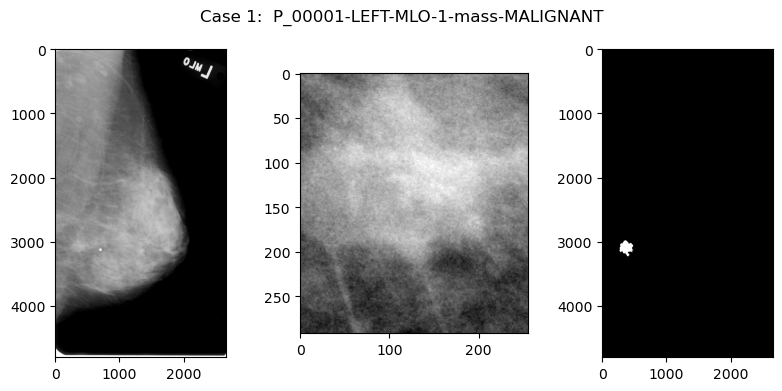

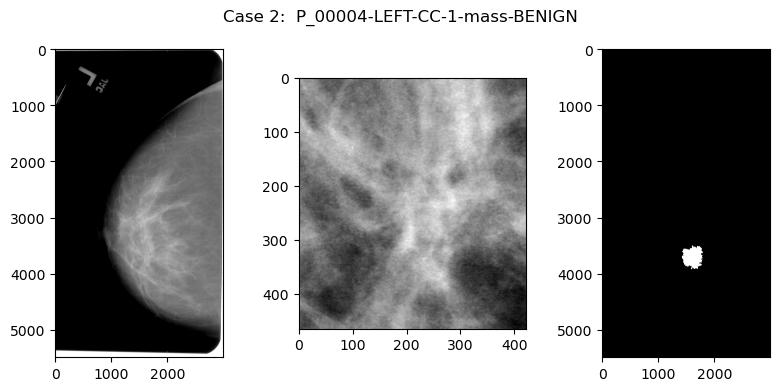

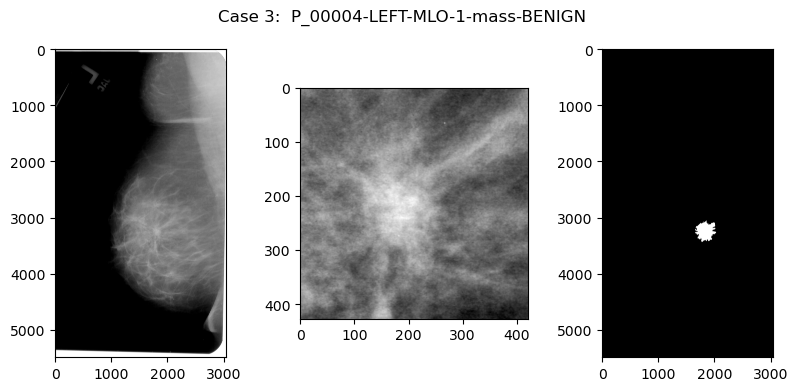

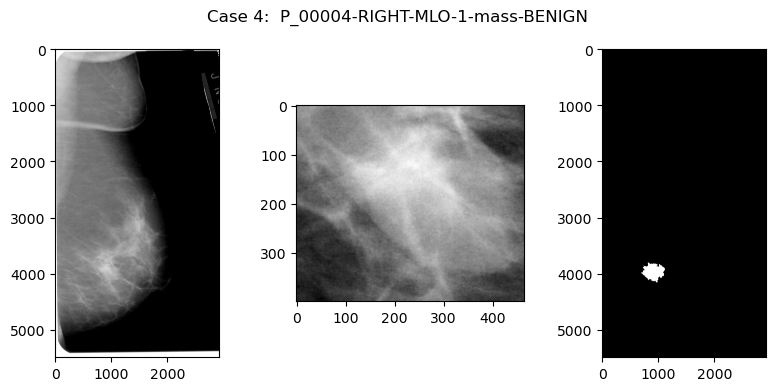

In [18]:
# visualize some samples from the dataset, containing on each row the full mammogram, 
# the coresponding cropped image and the ROI mask

for i in range (5):  
    # create a figure with three subgraphics on the same line
    fig, axs = plt.subplots(1, 3, figsize=(10, 4))
    
    # remove grid lines
    for ax in axs:
        ax.grid(False)
    
    # show each image on a separate subgraph
    axs[0].imshow(plt.imread(full_mammo[i]),cmap='gray')
    axs[1].imshow(plt.imread(cropped_images[i]),cmap='gray')
    axs[2].imshow(plt.imread(masks[i]),cmap='gray')
    
    id=data_df["patient_id"].iloc[i]
    position=data_df["left or right breast"].iloc[i]
    view=data_df["image view"].iloc[i]
    abnormality_id = data_df["abnormality id"].iloc[i]
    abnormality_type = data_df["abnormality type"].iloc[i]
    pathology=data_df["pathology"].iloc[i]
    
    fig.suptitle('Case {}'.format(str(i)+":  "+id+"-"+position+"-"+view+"-"+str(abnormality_id)+"-"+str(abnormality_type)+"-"+str(pathology)))
    
    # show the figure
    plt.show()


In [19]:
import shutil

# Define the folders where the files will be saved
output_folder = "cbis-ddsm-clean"
output_folder_benign = "cbis-ddsm-clean/benign"
output_folder_malignant = "cbis-ddsm-clean/malignant"

# Delete folder if exists
if os.path.exists(output_folder_benign):
    shutil.rmtree(output_folder_benign)
    
# Delete folder if exists
if os.path.exists(output_folder_malignant):
    shutil.rmtree(output_folder_malignant)
    
# Delete folder if exists
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)
    
# Create the output folder if it doesn't exist yet
if not os.path.exists(output_folder_benign):
    os.makedirs(output_folder_benign)
    

if not os.path.exists(output_folder_malignant):
    os.makedirs(output_folder_malignant)
    
# Create empty DataFrames for the filtered rows
data_df_benign = pd.DataFrame(columns=data_df.columns)
data_df_malignant = pd.DataFrame(columns=data_df.columns)

In [20]:
import pandas as pd

# Create dictionaries to store the last abnormality ID for each (patient_id, position, view) combination
last_abnormality_id_benign = {}
last_abnormality_id_malignant = {}

count_malignant = 1
count_benign = 1

for i in range(len(data_df)):
    if i not in err:
        id = data_df["patient_id"].iloc[i]
        position = data_df["left or right breast"].iloc[i]
        view = data_df["image view"].iloc[i]
        abnormality_id = data_df["abnormality id"].iloc[i]
        abnormality_type = data_df["abnormality type"].iloc[i]
        pathology = data_df["pathology"].iloc[i]
        
        # Check if the current record matches an existing record with a different abnormality ID
        if pathology == "MALIGNANT":
            full_mammo_new_name = f"malignant ({count_malignant}).png"            
            last_abnormality_id = last_abnormality_id_malignant.get((id, position, view), None)
            if last_abnormality_id is not None:
                cropped_images_new_name = f"malignant ({last_abnormality_id_malignant[(id, position, view)]})_cropped_{abnormality_id}.png"
                masks_new_name = f"malignant ({last_abnormality_id_malignant[(id, position, view)]})_mask_{abnormality_id}.png"
                data_df_malignant = data_df_malignant.append(data_df.loc[i])
            else:
                output_folder = output_folder_malignant
                cropped_images_new_name = f"malignant ({count_malignant})_cropped.png"
                masks_new_name = f"malignant ({count_malignant})_mask.png"
                last_abnormality_id_malignant[(id, position, view)] = i
                count_malignant += 1
                data_df_malignant = data_df_malignant.append(data_df.loc[i])
        else:
            last_abnormality_id = last_abnormality_id_benign.get((id, position, view), None)
            full_mammo_new_name = f"benign ({count_benign}).png"
            if last_abnormality_id is not None:
                cropped_images_new_name = f"benign ({last_abnormality_id_benign[(id, position, view)]})_cropped_{abnormality_id}.png"
                masks_new_name = f"benign ({last_abnormality_id_benign[(id, position, view)]})_mask_{abnormality_id}.png"
                data_df_benign = data_df_benign.append(data_df.loc[i])
            else:
                output_folder = output_folder_benign
                cropped_images_new_name = f"benign ({count_benign})_cropped.png"
                masks_new_name = f"benign ({count_benign})_mask.png"
                last_abnormality_id_benign[(id, position, view)] = i
                count_benign += 1
                data_df_benign = data_df_benign.append(data_df.loc[i])
        
        # Copy the files to the output folder with the new names
        shutil.copy(full_mammo[i], os.path.join(output_folder, full_mammo_new_name))
        shutil.copy(cropped_images[i], os.path.join(output_folder, cropped_images_new_name))
        shutil.copy(masks[i], os.path.join(output_folder, masks_new_name))

In [21]:
# Define the output folder name
output_folder = "cbis-ddsm-clean"

# Save the DataFrame to a CSV file in the output folder
data_df.to_csv(f'{output_folder}/data_df.csv', index=False)
data_df_benign.to_csv(f'{output_folder}/data_df_benign.csv', index=False)
data_df_malignant.to_csv(f'{output_folder}/data_df_malignant.csv', index=False)
